In [5]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [10]:
from sklearn.decomposition import PCA

In [11]:
from sklearn.cluster import KMeans

In [1]:
from scipy.stats import bootstrap

In [2]:
from sklearn.metrics import adjusted_rand_score

In [6]:
mcdonalds = pd.read_csv('D:\python\mcdonalds.csv')

In [7]:
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [14]:
MD_x = mcdonalds.iloc[:, :11].apply(lambda col: col.map({"Yes": 1, "No": 0})).values

In [15]:
col_means = np.round(np.mean(MD_x, axis=0), 2)
print("Column means:", col_means)


Column means: [0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [16]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [17]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Components:", pca.components_)

Explained variance ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Components: [[ 0.47693349  0.15533159  0.00635636 -0.11623168 -0.3044427   0.10849325
   0.33718593  0.47151394 -0.32904173  0.21371062 -0.37475293]
 [-0.36378978 -0.016414   -0.01880869  0.03409395  0.06383884  0.0869722
   0.61063276 -0.3073178  -0.60128596 -0.07659344  0.13965633]
 [ 0.30444402  0.0625153   0.03701866  0.32235949  0.80237317  0.06464172
   0.14931026  0.28726479 -0.02439661 -0.19205128  0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [ 0.30753507 -0.27760805 -0.07062017  0.07340475 -0.36139895 -0.10793025
   0.12897259  0.21089912  0.00312457 -0.28784553  0.72920859]
 [-0.17073819  0.34783006  0.3550866   0.40651542 -0.20934711  0.59463206
   0.10324067  0.07691443  0.26134151  0.17822612  0.21087805]
 [-0.28051863 -0.

In [28]:
SD = np.sqrt(pca.explained_variance_)
print("Standard Deviation:\n", SD.round(1))

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [30]:
rot_matrix = pca.components_.T
index = ["PC" + str(i + 1) for i in range(pca.n_components_)]  # Create PC1, PC2, etc.
rot_df = pd.DataFrame(rot_matrix, index=mcdonalds.columns[:11], columns=index)
rot_df = round(-rot_df, 3)
print(rot_df)

              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304 -0.055 -0.308  0.171  0.281  0.013  0.572   
convenient -0.155  0.016 -0.063  0.142  0.278 -0.348  0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037 -0.198  0.071 -0.355 -0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322  0.354 -0.073 -0.407  0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802 -0.254  0.361  0.209 -0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065  0.097  0.108 -0.595  0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149 -0.119 -0.129 -0.103  0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287  0.003 -0.211 -0.077 -0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024 -0.068 -0.003 -0.261  0.068  0.030  0.067   
healthy    -0.214  0.077  0.192 -0.763  0.288 -0.178  0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089 -0.370 -0.729 -0.211  0.027 -0.167 -0.072   

             PC10   PC11  
yummy      -0.110  0.045  
convenient -0.666 -0.

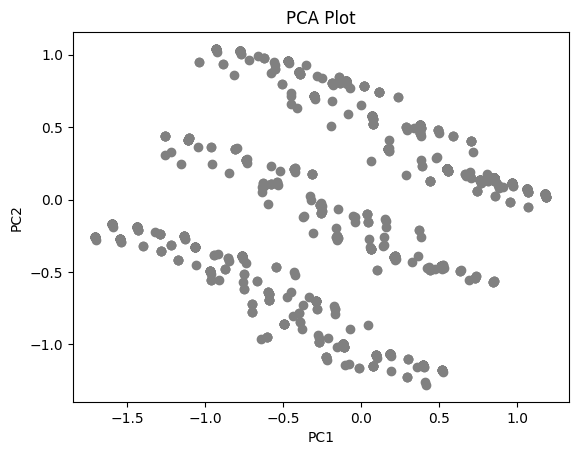

In [31]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Plot")
plt.show()

In [19]:
np.random.seed(1234)
range_clusters = range(2, 9)
inertia = []
models = []

In [20]:
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)
    models.append(kmeans)

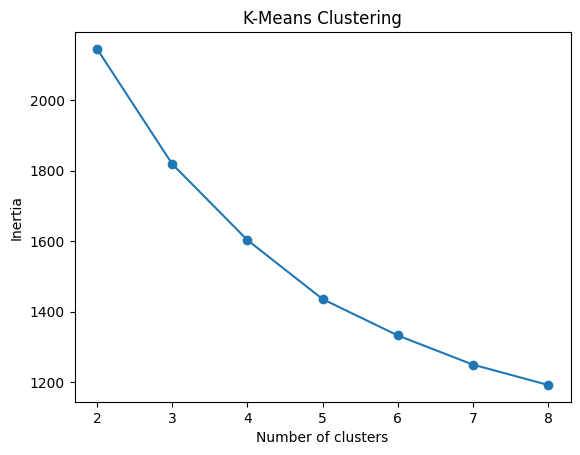

In [21]:
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("K-Means Clustering")
plt.show()

In [22]:
bootstrap_results = []

In [23]:
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    labels = kmeans.labels_
    boot_ari = []

    for _ in range(100):  # Bootstrap iterations
        sample_idx = np.random.choice(len(MD_x), len(MD_x), replace=True)
        sample = MD_x[sample_idx]
        kmeans_sample = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(sample)
        ari = adjusted_rand_score(labels[sample_idx], kmeans_sample.labels_)
        boot_ari.append(ari)

    bootstrap_results.append(np.mean(boot_ari))

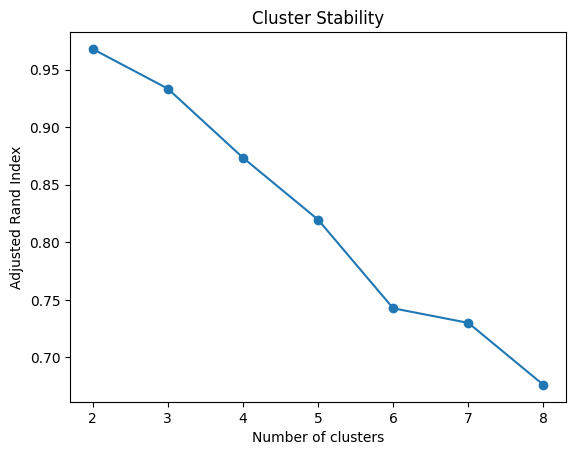

In [25]:
plt.plot(range_clusters, bootstrap_results, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Index")
plt.title("Cluster Stability")
plt.show()

In [26]:
k4_model = models[2]  
k4_labels = k4_model.labels_

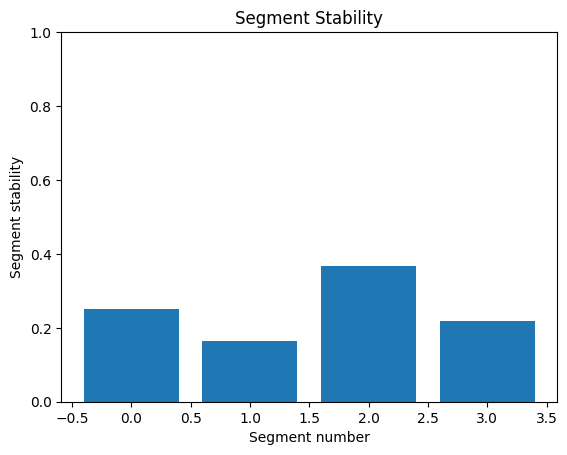

In [27]:
plt.bar(range(len(np.unique(k4_labels))), np.bincount(k4_labels) / len(MD_x))
plt.ylim(0, 1)
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.title("Segment Stability")
plt.show()